In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('First_submission.csv')

print(df.count())

SubjectID     73888
Prediction    73888
dtype: int64


In [ ]:
import pandas as pd 

df = pd.read_csv('training_fold_1.csv')

print(df.count())

Input Path      599415
Ground-Truth    599415
dtype: int64


In [4]:
df = pd.read_csv('val_fold_1.csv')

print(df.count())

Input Path      149854
Ground-Truth    149854
dtype: int64


In [9]:
print(599415+149854)

749269


In [8]:
df1 = pd.read_csv('training_fold_2.csv')
print(df1.count())
df2 = pd.read_csv('val_fold_2.csv')
print(df2.count())

Input Path      599415
Ground-Truth    599415
dtype: int64
Input Path      149854
Ground-Truth    149854
dtype: int64


In [10]:
df = pd.read_csv('dataset.csv')
df.head()

,Input Path,Ground-Truth
0,DM/BraTSPath_DM_0000785.jpg,DM
1,DM/BraTSPath_DM_0003021.jpg,DM
2,DM/BraTSPath_DM_0000685.jpg,DM
3,DM/BraTSPath_DM_0000543.jpg,DM
4,DM/BraTSPath_DM_0000161.jpg,DM


In [5]:
# Replace 'column_name' with the actual column you want to check
unique_count = df['Prediction'].nunique()
print(f"Number of unique elements in column: {unique_count}")
print(df['Prediction'].value_counts())

Number of unique elements in column: 9
Prediction
0    28992
4    17349
3    11972
1     9023
2     3008
5     2141
6      779
8      541
7       83
Name: count, dtype: int64


##for new csv


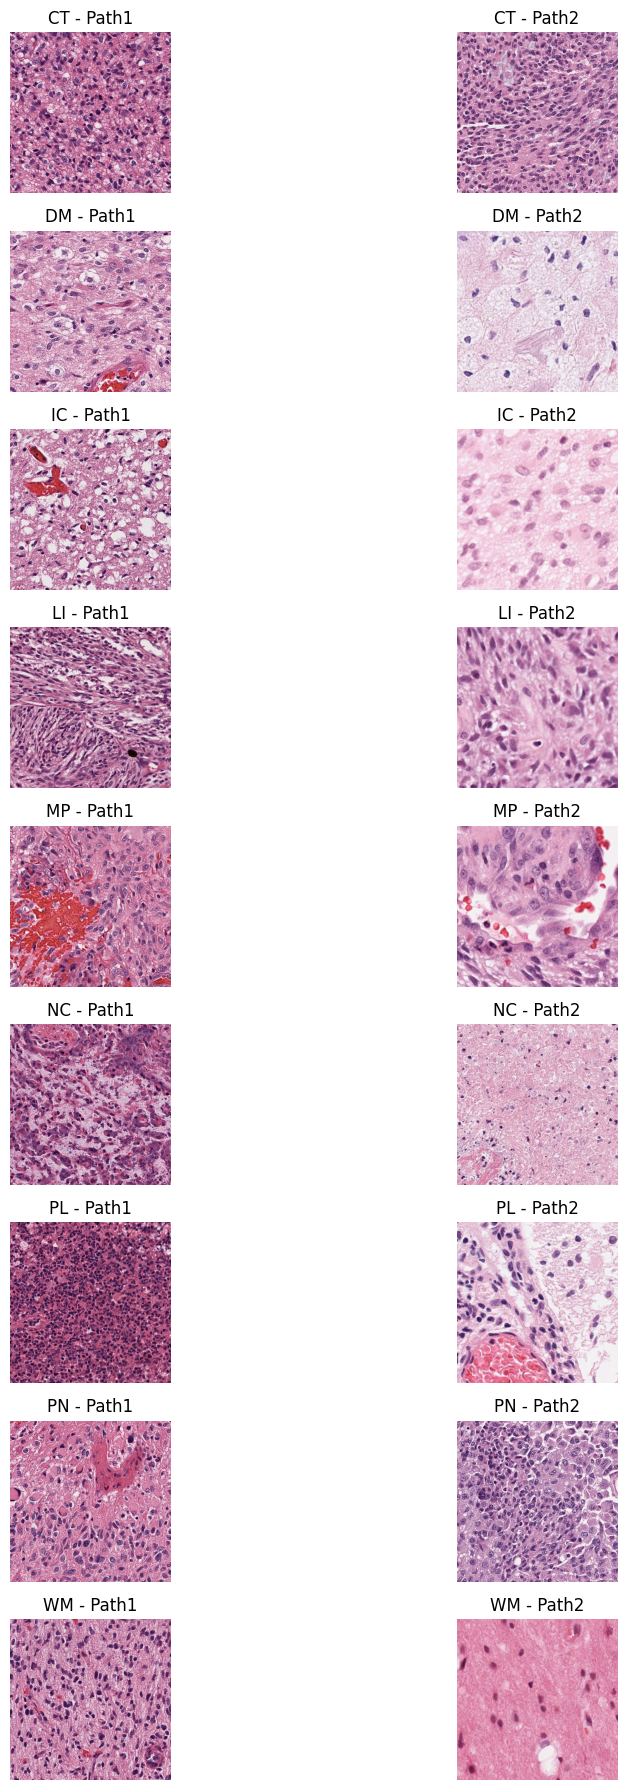

In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image


path1 = "../New-Data-384-Collated-JPG"
path2 = "../BraTS-Path2025-Train-2-JPG/Validation-Data-384-Collated-JPG"

folders = sorted(os.listdir(path1))
folders = [f for f in folders if os.path.isdir(os.path.join(path1, f))]

plt.figure(figsize=(12, 2 * len(folders)))

for idx, folder in enumerate(folders):
    img1_dir = os.path.join(path1, folder)
    img2_dir = os.path.join(path2, folder)
    img1_list = sorted(os.listdir(img1_dir))
    img2_list = sorted(os.listdir(img2_dir))
    # Skip if no images in either folder
    if not img1_list or not img2_list:
        continue
    img1_path = os.path.join(img1_dir, img1_list[20])
    img2_path = os.path.join(img2_dir, img2_list[20])
    img1 = Image.open(img1_path)
    img2 = Image.open(img2_path)
    
    plt.subplot(len(folders), 2, idx * 2 + 1)
    plt.imshow(img1)
    plt.title(f"{folder} - Path1")
    plt.axis('off')
    
    plt.subplot(len(folders), 2, idx * 2 + 2)
    plt.imshow(img2)
    plt.title(f"{folder} - Path2")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# Load your CSV
df = pd.read_csv('ProvGigaPath_Exp4_Fold2.csv')

# Count class distribution for ground truth and prediction
gt_counts = df['Ground-Truth'].value_counts().sort_index()
pred_counts = df['Prediction'].value_counts().sort_index()

print("Ground‑Truth class counts:\n", gt_counts)
print("\nPrediction class counts:\n", pred_counts)


Ground‑Truth class counts:
 Ground-Truth
0    19302
1    67087
2     8357
3    69625
4     4328
5    37124
6     2170
7      565
8     1002
Name: count, dtype: int64

Prediction class counts:
 Prediction
0    19669
1    64537
2    10051
3    68358
4     5798
5    37094
6     2290
7      665
8     1098
Name: count, dtype: int64


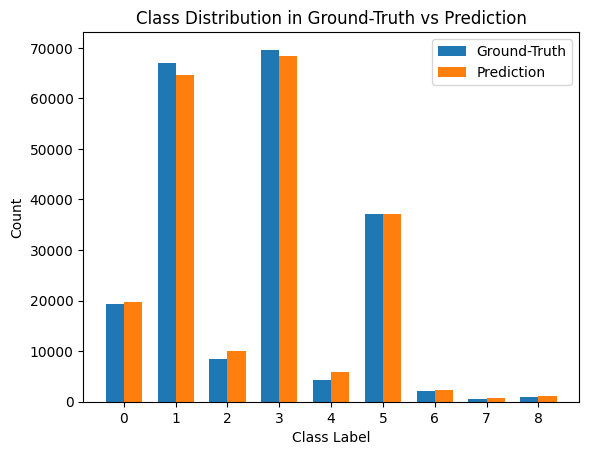

In [7]:
import matplotlib.pyplot as plt
import numpy as np

labels = list(range(9))  # 0–8
gt = [gt_counts.get(i, 0) for i in labels]
pr = [pred_counts.get(i, 0) for i in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, gt, width, label='Ground-Truth')
ax.bar(x + width/2, pr, width, label='Prediction')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xlabel('Class Label')
ax.set_ylabel('Count')
ax.set_title('Class Distribution in Ground-Truth vs Prediction')
ax.legend()
plt.show()


In [8]:
import pandas as pd

cm = pd.crosstab(df['Ground-Truth'], df['Prediction'], normalize='index')
print(cm)


Prediction           0         1         2         3         4         5  \
Ground-Truth                                                               
0             0.995389  0.002176  0.000259  0.000052  0.000155  0.001865   
1             0.003831  0.954119  0.013251  0.001029  0.021703  0.004874   
2             0.000718  0.017590  0.967811  0.008017  0.004188  0.000718   
3             0.000503  0.001020  0.014980  0.979792  0.000632  0.000072   
4             0.000924  0.019409  0.004390  0.000000  0.973660  0.000693   
5             0.003987  0.004741  0.000162  0.000000  0.001131  0.989010   
6             0.000000  0.002304  0.000461  0.000922  0.000000  0.000461   
7             0.000000  0.005310  0.000000  0.000000  0.007080  0.000000   
8             0.005988  0.000000  0.000000  0.000998  0.000000  0.000000   

Prediction           6         7         8  
Ground-Truth                                
0             0.000000  0.000104  0.000000  
1             0.000999  0.00